# <center> </center>
# <center> 9c. GARCH Simulation
## <center> ECO374

If using Colab, mount Google Drive and set path to files

In [1]:
import os
IN_COLAB = 'COLAB_GPU' in os.environ  
if IN_COLAB:
  from google.colab import drive; mount_path = '/content/drive'
  not os.path.ismount(mount_path) and drive.mount(mount_path)
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Python_code') # Set Python file directory

Set up R for Python

In [2]:
import R_for_Python_setup as RPY
RPY.setup_R()
ro, pandas2ri, StrVector = RPY.initialize_rpy2()
%load_ext rpy2.ipython

R installed
Operating system: Windows
Development tool: Anaconda


Load R packages

In [3]:
R_packages = ['rugarch']
RPY.load_R_packages(R_packages)

R packages loaded: rugarch


Load Python packages

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Simulation
Simulate GARCH(1,1) process with low and high persistence

In [5]:
%%R
set.seed(2345)
garch_model1 <- rugarch::ugarchspec(variance.model = list(model="sGARCH", garchOrder=c(1, 1)), 
                mean.model = list(armaOrder=c(0, 0)), 
                fixed.pars=list(mu=0, omega=2, alpha1=0.3, beta1=0.4))
garch_sim1 <- rugarch::ugarchpath(garch_model1, n.sim = 1000)
r1 <- data.frame(garch_sim1@path$seriesSim)
colnames(r1) <- "G1"

garch_model2 <- rugarch::ugarchspec(variance.model = list(model="sGARCH", garchOrder=c(1, 1)), 
                mean.model = list(armaOrder=c(0, 0)), 
                fixed.pars=list(mu=0, omega=2, alpha1=0.1, beta1=0.88))
garch_sim2 <- rugarch::ugarchpath(garch_model2, n.sim = 1000)
r2 <- data.frame(garch_sim2@path$seriesSim)
colnames(r2) <- "G2"

In [6]:
r1 = ro.globalenv['r1']
r1 = pandas2ri.rpy2py(r1)
r2 = ro.globalenv['r2']
r2 = pandas2ri.rpy2py(r2)

Plot

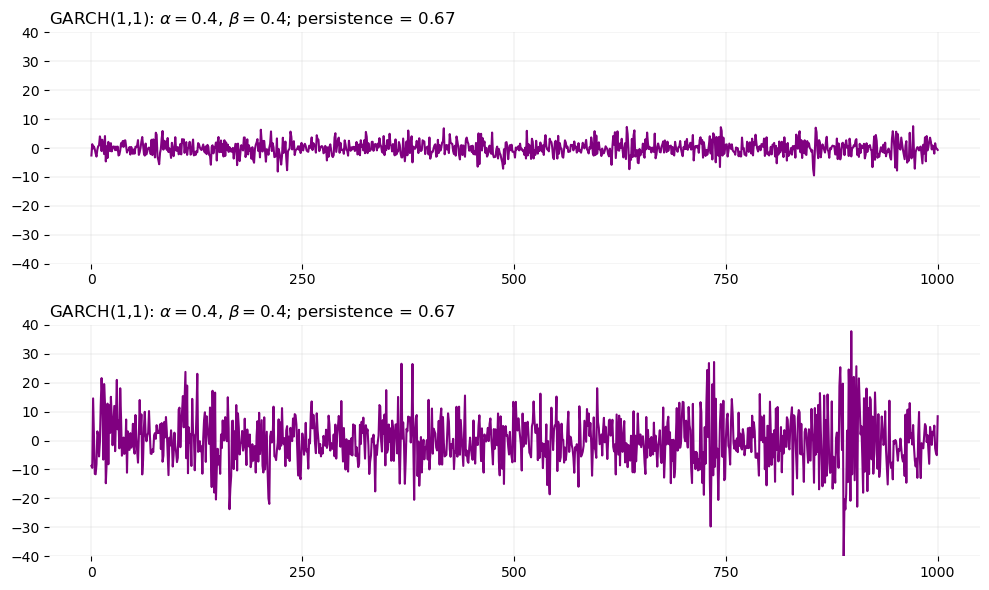

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
axs = axs.flatten()

axs[0].plot(r1, color='purple')
axs[0].set_ylim(-40, 40)
axs[0].set_xticks([0, 249, 499, 749, 999], labels=['0', '250', '500', '750', '1000'])
axs[0].set_title(r'GARCH(1,1): $\alpha = 0.4$, $\beta = 0.4$; persistence = 0.67', loc='left')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].grid(which='major', color='lightgrey', linewidth=0.3)
axs[0].set_frame_on(False)

axs[1].plot(r2, color='purple')
axs[1].set_ylim(-40, 40)
axs[1].set_xticks([0, 249, 499, 749, 999], labels=['0', '250', '500', '750', '1000'])
axs[1].set_title(r'GARCH(1,1): $\alpha = 0.4$, $\beta = 0.4$; persistence = 0.67', loc='left')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].grid(which='major', color='lightgrey', linewidth=0.3)
axs[1].set_frame_on(False)

plt.tight_layout()
plt.show()

# 2. ACF and PACF
ACF and PACF of the GARCH draws

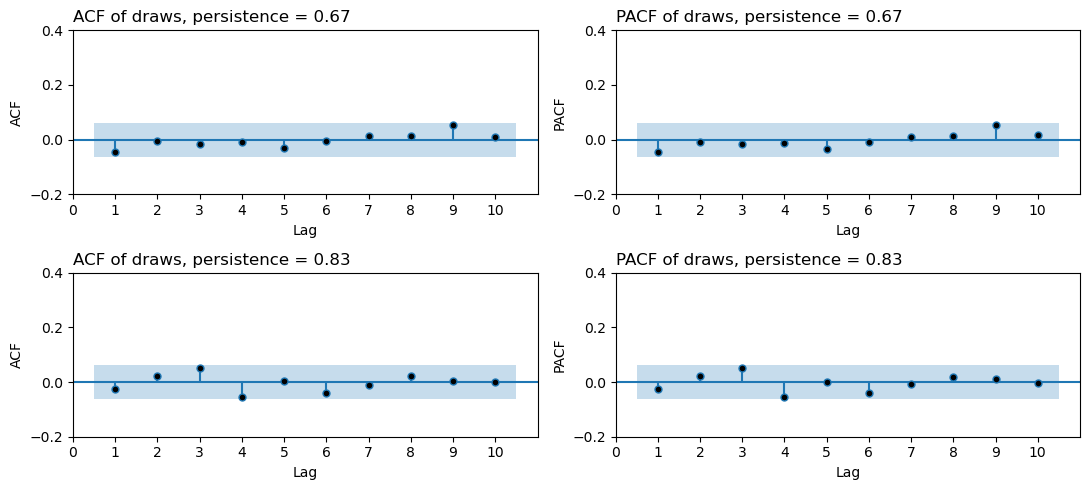

In [8]:
lag_max = 10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 5))
axs = axs.flatten()

plot_acf(r1, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[0])
axs[0].set_title('ACF of draws, persistence = 0.67', loc='left')
axs[0].set_ylabel('ACF')

plot_pacf(r1, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_title('PACF of draws, persistence = 0.67', loc='left')
axs[1].set_ylabel('PACF')

plot_acf(r2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[2])
axs[2].set_title('ACF of draws, persistence = 0.83', loc='left')
axs[2].set_ylabel('ACF')

plot_pacf(r2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_title('PACF of draws, persistence = 0.83', loc='left')
axs[3].set_ylabel('PACF')

for ax in axs:
  ax.set_ylim(-0.2,0.4)
  ax.set_xticks(np.arange(0, lag_max+1, step=1))
  ax.set_xlabel('Lag')

fig.tight_layout()
plt.show()

ACF and PACF of the GARCH draws square (variance)

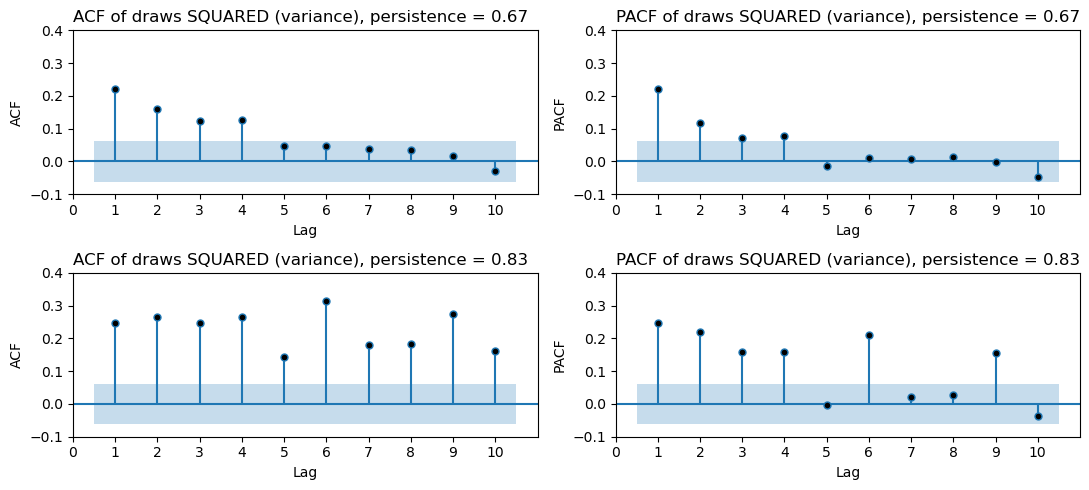

In [9]:
lag_max = 10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 5))
axs = axs.flatten()

plot_acf(r1**2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[0])
axs[0].set_title('ACF of draws SQUARED (variance), persistence = 0.67', loc='left')
axs[0].set_ylabel('ACF')

plot_pacf(r1**2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_title('PACF of draws SQUARED (variance), persistence = 0.67', loc='left')
axs[1].set_ylabel('PACF')

plot_acf(r2**2, lags=lag_max, alpha=0.05, zero=False, bartlett_confint=False, mfc='black', title=None, ax=axs[2])
axs[2].set_title('ACF of draws SQUARED (variance), persistence = 0.83', loc='left')
axs[2].set_ylabel('ACF')

plot_pacf(r2**2, lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_title('PACF of draws SQUARED (variance), persistence = 0.83', loc='left')
axs[3].set_ylabel('PACF')

for ax in axs:
  ax.set_ylim(-0.1,0.4)
  ax.set_xticks(np.arange(0, lag_max+1, step=1))
  ax.set_xlabel('Lag')

fig.tight_layout()
plt.show()